Natural Language Processing with Hotel Reviews Part 2
 =====
### Author: Stephanie Lo 
#### Date: 3.17.2023

# Table of Contents 



In [3]:
#importing base packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import os 
import time 

In [4]:
#Setting figure size & background 
plt.rcParams['figure.figsize'] = (8.0, 6.0)
sns.set_theme(style="darkgrid")

## 1.Introduction <a id="Intro"></a>

In [5]:
#directing to the right file path
os.chdir("/Users/mac/Desktop/Data/CAPSTONE/clean/")
cwd = os.getcwd() 

In [6]:
#reading in the datasets
combined_df = pd.read_csv("clean_data.csv")


combined_df.head(2)

,Unnamed: 0,overall,vote,verified,reviewerID,asin,reviewText,summary,day,month,year,reviewdate,trending_asin,title,ranking,product_description,also_buy_counts,also_view_counts,category
0,0,5.0,0.0,1,A2BR01CI7K7GAN,B00004U9V2,Bought for my daughter.,Has Good Reviews!,12,30,2017,2017-12-30,0,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,After a long day of handling thorny situations...,56.0,48.0,skincare
1,1,5.0,0.0,1,A1N6K3WYGUMHGO,B00004U9V2,Great cream for the skin.,Five Stars,12,29,2017,2017-12-29,0,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,After a long day of handling thorny situations...,56.0,48.0,skincare


#### Null and Duplicate Check

In [7]:
print(f"The final data shape has {review_df.shape[0]} columns and {review_df.shape[1]} rows") 

NameError: name 'review_df' is not defined

In [ ]:
#only taking numerical values 
review_df.info()

Let's just quickly check for any null values and duplicates quickly: 

In [8]:
#null values check 
print(f"Training set null values = {combined_df.isna().sum()}")

Training set null values = Unnamed: 0             0
overall                0
vote                   0
verified               0
reviewerID             0
asin                   0
reviewText             0
summary                1
day                    0
month                  0
year                   0
reviewdate             0
trending_asin          0
title                  0
ranking                0
product_description    0
also_buy_counts        0
also_view_counts       0
category               0
dtype: int64


In [9]:
combined_df = combined_df.dropna()
combined_df

,Unnamed: 0,overall,vote,verified,reviewerID,asin,reviewText,summary,day,month,year,reviewdate,trending_asin,title,ranking,product_description,also_buy_counts,also_view_counts,category
0,0,5.0,0.0,1,A2BR01CI7K7GAN,B00004U9V2,Bought for my daughter.,Has Good Reviews!,12,30,2017,2017-12-30,0,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,After a long day of handling thorny situations...,56.0,48.0,skincare
1,1,5.0,0.0,1,A1N6K3WYGUMHGO,B00004U9V2,Great cream for the skin.,Five Stars,12,29,2017,2017-12-29,0,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,After a long day of handling thorny situations...,56.0,48.0,skincare
2,2,1.0,0.0,0,A3KPTMMK9D967W,B00004U9V2,"Maybe Im just not familiar with this brand, bu...",Bad fragrance,12,28,2017,2017-12-28,0,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,After a long day of handling thorny situations...,56.0,48.0,skincare
3,3,5.0,0.0,1,A3CEUD9051WKC0,B00004U9V2,This is one of my favorite creams. Highly reco...,Great product.,12,28,2017,2017-12-28,0,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,After a long day of handling thorny situations...,56.0,48.0,skincare
4,4,5.0,0.0,1,A69VISV3LE7DA,B00004U9V2,"I simply love this lotion! Originally, I rece...",Five Stars,12,19,2017,2017-12-19,0,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,4324.0,After a long day of handling thorny situations...,56.0,48.0,skincare
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139600,140009,2.0,0.0,1,A2SK9NN2RW4YZG,B01D0KHXGK,Meh! Flat iron works better,Disappointing results!,4,6,2017,2017-06-04,0,TS2 Super Smoother Electric Hair Straightening...,171884.0,Thermally activated smoothing treatment combin...,0.0,0.0,haircare
139601,140010,1.0,0.0,1,AUKSUQXQ8677W,B01D0KHXGK,It doesn't grip the hair - I'm very disappointed.,One Star,3,12,2017,2017-12-03,0,TS2 Super Smoother Electric Hair Straightening...,171884.0,Thermally activated smoothing treatment combin...,0.0,0.0,haircare
139602,140011,4.0,0.0,1,A130Y9WKGNVKS7,B01D0KHXGK,Really works! I have curly hair and you can ge...,It works(:,2,22,2017,2017-02-22,0,TS2 Super Smoother Electric Hair Straightening...,171884.0,Thermally activated smoothing treatment combin...,0.0,0.0,haircare
139603,140012,1.0,0.0,1,A32Y66RM52YMU7,B01D0KHXGK,DIDNT STRAIGHTEN HAIR,One Star,2,17,2017,2017-02-17,0,TS2 Super Smoother Electric Hair Straightening...,171884.0,Thermally activated smoothing treatment combin...,0.0,0.0,haircare


In [10]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139604 entries, 0 to 139604
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           139604 non-null  int64  
 1   overall              139604 non-null  float64
 2   vote                 139604 non-null  float64
 3   verified             139604 non-null  int64  
 4   reviewerID           139604 non-null  object 
 5   asin                 139604 non-null  object 
 6   reviewText           139604 non-null  object 
 7   summary              139604 non-null  object 
 8   day                  139604 non-null  int64  
 9   month                139604 non-null  int64  
 10  year                 139604 non-null  int64  
 11  reviewdate           139604 non-null  object 
 12  trending_asin        139604 non-null  int64  
 13  title                139604 non-null  object 
 14  ranking              139604 non-null  float64
 15  product_descripti

Looks like the dataset is completely clean so let's move onto the modeling.

## 2. Modeling <a id="Modeling"></a>

In [ ]:
#loading the modules 

# Scalars
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# To make our sets
from sklearn.model_selection import train_test_split 

# The classifiers 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score

### 2.1. Logistic Regression <a id="Log"></a>

Firstly we can apply logistic regression to our data set. Let's separate out our target column from our features for each of our train and splits before we do so: 

In [16]:
#for numeric
from sklearn.model_selection import train_test_split
y = numeric_df["trending_asin"]
train, test  = train_test_split(numeric_df, test_size=0.3, stratify= y, random_state = 8)
print(f"Train shape {train.shape}")
print(f"Test shape {test.shape}")

NameError: name 'numeric_df' is not defined

In [17]:
#for all
from sklearn.model_selection import train_test_split
y = combined_df["trending_asin"]
train, test  = train_test_split(combined_df, test_size=0.3, stratify= y, random_state = 8)
print(f"Train shape {train.shape}")
print(f"Test shape {test.shape}")


Train shape (97722, 19)
Test shape (41882, 19)


In [18]:
#assigning train dataset for X and y 
y_train = train["trending_asin"]
X_train = train.drop(["trending_asin"],axis=1)

In [19]:
#assigning test dataset for X and y 
y_test = test["trending_asin"]
X_test = test.drop(["trending_asin"],axis=1)

To normalize the data we can also apply a standard scaler to the data by using StandardScaler. 

In [ ]:
# Instantiate the scaler
SS = StandardScaler()

# Fit the scaler
SS.fit(X_train)

# Transform the training and test sets 
X_train_ss = SS.transform(X_train)
X_test_ss = SS.transform(X_test)

In [ ]:

logreg = LogisticRegression(solver='lbfgs',
                            max_iter = 10000)

# Fit the model 
logreg.fit(X_train_ss, y_train)

# Score the model 

log_train_acc = logreg.score(X_train_ss, y_train)
log_test_acc = logreg.score(X_test_ss, y_test)


print(f"Model: {logreg}")

In [ ]:
# Score the model 
print(f"Train Accuracy Score: {round(log_train_acc,4)*100}%")
print(f"Test Accuracy Score: {round(log_test_acc ,4)*100}%")

In [ ]:
#figuring out baseline to compare against
pct = 100 - (y_train.sum()/y_train.shape[0]*100)
print(f"Number of review in the training dataset that have trending products: {y_train.sum()} which means our baseline for the model is: {round(pct,4)}%")

In [ ]:
logreg.coef_.shape

In [ ]:
#forming df with feature column names and coefficients combined. Reference: https://stackoverflow.com/questions/57924484/finding-coefficients-for-logistic-regression-in-python
reviews = pd.DataFrame(zip(X_train.columns, np.transpose(logreg.coef_)), columns=['features', 'coef'])
reviews.head(7)

## Count Vectorizer

We will start by inputting a count vectorizer on the model for the review data. 

In [54]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

In [55]:
train["length"]=train["reviewText"].apply(length)

In [57]:
train

,Unnamed: 0,overall,vote,verified,reviewerID,asin,reviewText,summary,day,month,...,r_dry,r_little,r_long,r_doesn,r_products,r_smell,r_nice,r_years,r_smells,length
0,39551,1.0,0.0,1,A1JY0IEAD7NJ8I,B000ZOFUOC,Broke my skin out with cystic acne after 2 use...,Caused my Cystic acne,9,25,...,0,0,0,0,0,0,0,0,0,139
1,33486,5.0,0.0,1,A33FENOSRH6JFG,B000PZA2KS,Great for thin and brittle nails. While it's ...,Great for thin and brittle nails,6,13,...,0,0,0,0,0,0,0,0,0,125
2,42397,5.0,0.0,1,ADJC1WQONOPVR,B0015476RU,I liked the Korres Lip Butter. It makes the l...,I liked the Korres Lip Butter,7,22,...,0,0,0,0,0,0,0,0,0,170
3,117979,5.0,0.0,1,A50UIBBGEUBHU,B00NI2ULJW,"I love this stuff, I use it every day. It make...",Magical oil!,8,17,...,0,0,0,1,0,0,0,0,0,153
4,8447,5.0,0.0,1,A3KDSFEH3XP990,B0002ZW5UQ,I like it work great on hair make it look ful...,Five Stars,8,23,...,0,0,0,0,0,0,0,0,0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97717,111559,2.0,4.0,1,A2P2DGFPH5ON5Z,B00J66M2SM,I bought it to cover my wrist tattoo since it ...,Didn't work for me,12,11,...,0,0,0,0,1,0,0,0,0,383
97718,123690,1.0,8.0,1,AGG49WKC1D6WH,B00UY6WEFO,The product is fantastic but I think I got abo...,The spray container is empty- buyer beware,1,5,...,0,0,0,0,0,0,0,0,0,118
97719,136236,5.0,0.0,1,A21N44J90IRH7,B01CRB98BG,Works great I highly recommend,Five Stars,4,13,...,0,0,0,0,0,0,0,1,0,30
97720,92260,5.0,0.0,1,A2F239LT1G70GB,B00B59AULY,Another great neutral from Essie! More of a br...,Another great neutral!,3,24,...,0,0,0,0,0,0,0,0,0,74


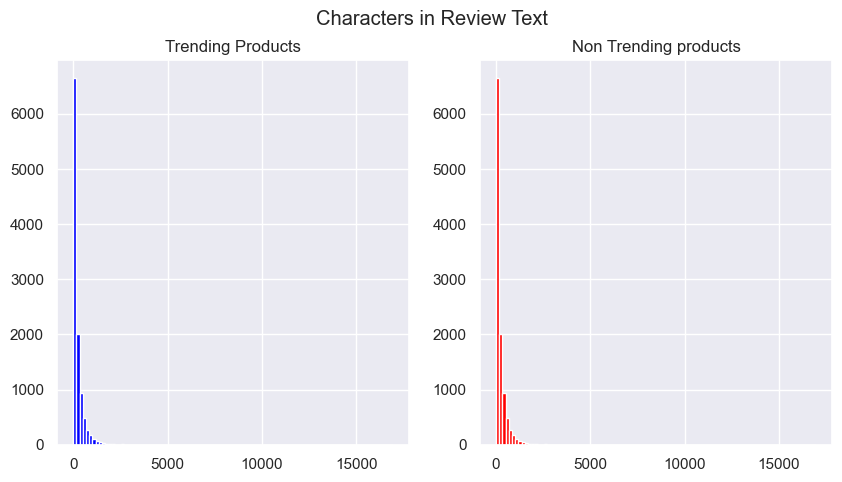

In [70]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
review_len=train[train['trending_asin']==1]['reviewText'].str.len()
ax1.hist(review_len,color='blue',bins=100)
ax1.set_title('Trending Products')
tweet_len=train[train['trending_asin']==0]['reviewText'].str.len()
ax2.hist(review_len,color='red',bins=100)
ax2.set_title('Non Trending products')
fig.suptitle('Characters in Review Text')
plt.show()

In [14]:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

Index(['Unnamed: 0', 'overall', 'vote', 'verified', 'reviewerID', 'asin',
       'reviewText', 'summary', 'day', 'month', 'year', 'reviewdate',
       'trending_asin', 'title', 'ranking', 'product_description',
       'also_buy_counts', 'also_view_counts', 'category'],
      dtype='object')

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

# 1. Instantiate 
bagofwords = CountVectorizer(stop_words="english",#removing stop words
                             min_df=0.05,
                             max_features= 2000,        #showing up in minimum 10% of documents     #only selecting 100 columns  
                             )    

# 2. Fit 
bagofwords.fit(train['reviewText'])

# 3. Transform
train_transformed = bagofwords.transform(train['reviewText'])
train_transformed

<97722x30 sparse matrix of type '<class 'numpy.int64'>'
	with 290238 stored elements in Compressed Sparse Row format>

In [21]:
#making into an array
train_transformed.toarray().sum(axis=0)
train_transformed.shape

(97722, 30)

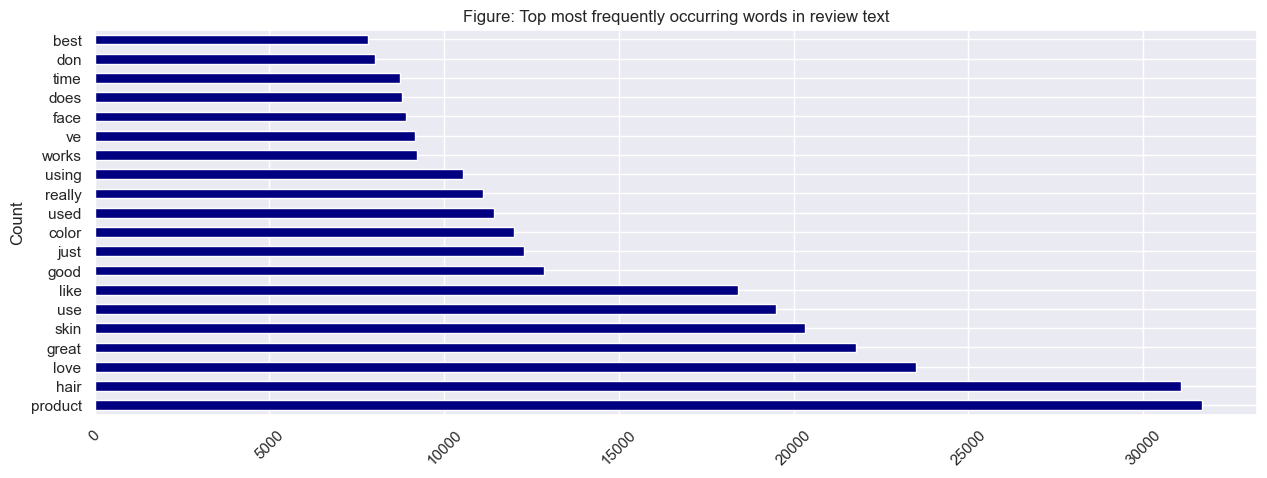

In [22]:
#plotting it out

pos_word_counts = pd.DataFrame(
    {"counts": train_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

pos_word_counts.head(20).plot(kind="barh", figsize=(15, 5), legend=False, color = "navy")
plt.title("Figure: Top most frequently occurring words in review text")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [27]:
review_word_counts = pd.DataFrame(
    {"words": bagofwords.get_feature_names_out(),
    "counts": train_transformed.toarray().sum(axis=0)
     }
).sort_values("counts", ascending=False).reset_index().drop(columns = "index")

In [28]:
review_word_counts["words"] = 'r_' + review_word_counts['words'].astype(str)
review_word_counts

,words,counts
0,r_product,31680
1,r_hair,31075
2,r_love,23511
3,r_great,21789
4,r_skin,20322
5,r_use,19482
6,r_like,18411
7,r_good,12862
8,r_just,12290
9,r_color,12001


In [33]:
review_vect_df = pd.DataFrame(train_transformed.todense(), columns= review_word_counts["words"])
review_vect_df

words,r_product,r_hair,r_love,r_great,r_skin,r_use,r_like,r_good,r_just,r_color,...,r_day,r_dry,r_little,r_long,r_doesn,r_products,r_smell,r_nice,r_years,r_smells
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97717,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
97718,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97719,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
97720,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [36]:
trending_graph = pd.concat([train["trending_asin"].reset_index(drop=True), review_vect_df.reset_index(drop=True)], axis=1)

In [44]:
columns = trending_graph.columns[trending_graph.columns.str.startswith('r_')]

In [51]:
#show graph with different count vectorizer counts
df = pd.pivot_table(trending_graph, index = "trending_asin",aggfunc = "sum")
df

,r_best,r_color,r_day,r_does,r_doesn,r_don,r_dry,r_face,r_good,r_great,...,r_skin,r_smell,r_smells,r_time,r_use,r_used,r_using,r_ve,r_works,r_years
trending_asin,,,,,,,,,,,,,,,,,,,,,
0,9511,19443,15875,5408,16595,5497,5643,20598,6820,7569,...,5951,9187,5202,27939,6965,29613,15881,6215,6012,8239
1,1598,2346,4447,919,2887,1084,715,2913,2084,1223,...,931,1347,480,3741,1053,1462,2530,797,1026,970


In [74]:
df.columns

Index(['r_best', 'r_color', 'r_day', 'r_does', 'r_doesn', 'r_don', 'r_dry',
       'r_face', 'r_good', 'r_great', 'r_hair', 'r_just', 'r_like', 'r_little',
       'r_long', 'r_love', 'r_nice', 'r_product', 'r_products', 'r_really',
       'r_skin', 'r_smell', 'r_smells', 'r_time', 'r_use', 'r_used', 'r_using',
       'r_ve', 'r_works', 'r_years'],
      dtype='object')

In [34]:
#concatenating neg_vector to test
train = pd.concat([train.reset_index(drop=True), review_vect_df.reset_index(drop=True)], axis=1)
train.sample(2)

,Unnamed: 0,overall,vote,verified,reviewerID,asin,reviewText,summary,day,month,...,r_day,r_dry,r_little,r_long,r_doesn,r_products,r_smell,r_nice,r_years,r_smells
90569,94571,5.0,0.0,1,A25F71GJ7QWGN1,B00BXKET7G,"Works really well as sunscreen, blends nicely ...",blends nicely into my skin tone and doesn't le...,4,6,...,1,0,0,0,0,0,0,0,1,0
87523,111785,2.0,6.0,1,A2UANQQS3FBS26,B00JB2RFL0,Product wasn't what I was told it would be by ...,Disappointed,10,2,...,0,0,0,0,0,0,0,0,1,0


### count vectorizer on review headline

In [80]:
 from sklearn.feature_extraction.text import CountVectorizer

# 1. Instantiate 
bagofwords = CountVectorizer(stop_words="english",#removing stop words
                             min_df=0.02,
                             max_features= 2000,        #showing up in minimum 10% of documents     #only selecting 100 columns  
                             )    

# 2. Fit 
bagofwords.fit(train['summary'])

# 3. Transform
train_transformed = bagofwords.transform(train['summary'])
train_transformed

<97722x12 sparse matrix of type '<class 'numpy.int64'>'
	with 77511 stored elements in Compressed Sparse Row format>

In [81]:
#making into an array
train_transformed.toarray().sum(axis=0)
train_transformed.shape

(97722, 12)

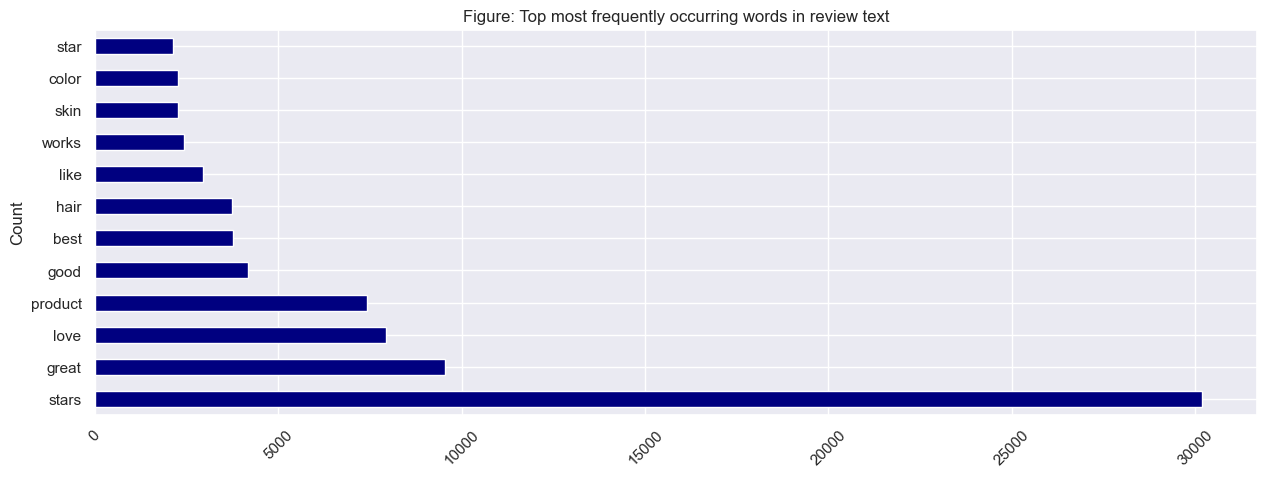

In [82]:
#plotting it out

pos_word_counts = pd.DataFrame(
    {"counts": train_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

pos_word_counts.head(20).plot(kind="barh", figsize=(15, 5), legend=False, color = "navy")
plt.title("Figure: Top most frequently occurring words in review text")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Porter stemmer

In [92]:
# the python string package has a helpful punctuation list
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [103]:
# library to clean data
import re
 
#to remove stopword
from nltk.corpus import stopwords
 
# for Stemming propose
from nltk.stem.porter import PorterStemmer

ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):
    '''
    Custom tokernizer for preprocessing. 
    
    Input: string, raw document
    Output:  
    
    '''
    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    ps = PorterStemmer()
    
    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = ps.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

In [104]:
sentence  = "the quick fox jumped over the lazy dog"

In [105]:
my_tokenizer(sentence)

['quick', 'fox', 'jump', 'lazi', 'dog']

In [108]:
train, test  = train_test_split(combined_df, test_size=0.3, stratify= y, random_state = 8)

In [109]:
train_review = train["reviewText"]
test_review = test["reviewText"]

In [110]:
bagofwords = CountVectorizer(min_df=5, 
                             tokenizer=my_tokenizer)
bagofwords.fit(train_review)

X_train_transformed = bagofwords.transform(train_review)
X_test_transformed = bagofwords.transform(test_review)

X_train_transformed.shape

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(97722, 7343)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


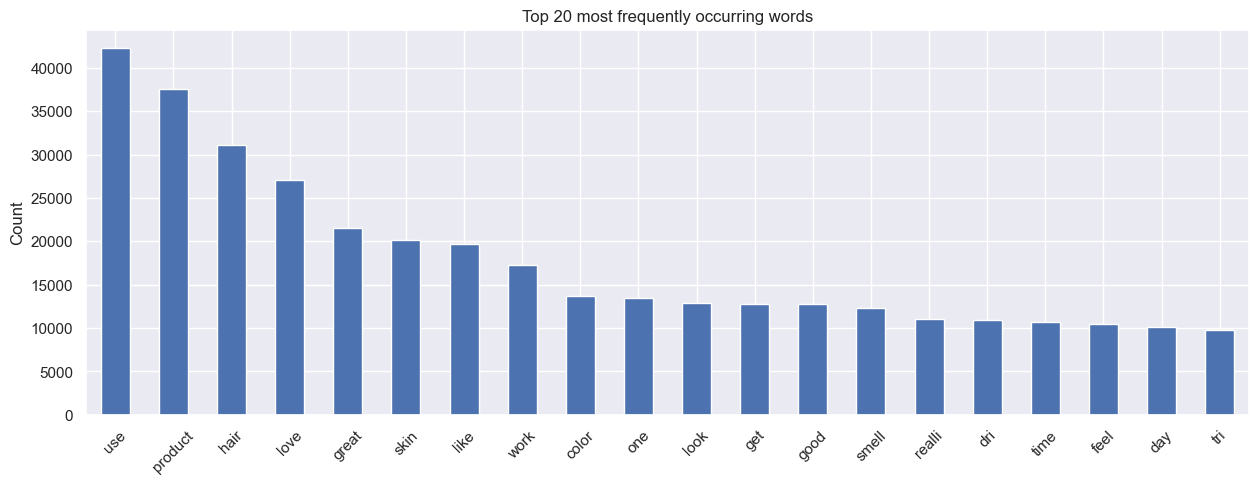

In [111]:
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

bi-grams 

Tasks-to-do: 
- add brands 
- figure out cost
- finish count vectorization
- remove or account for unnecessary columns

Let's refit our best parameters to the model: 

In [76]:
#assigning remainder dataset for X and y 
y_train= train_df["rating"]
X_train = train_df.drop(["rating"],axis=1)

In [77]:
#assigning test dataset for X and y 
y_test = test_df["rating"]
X_test = test_df.drop(["rating"],axis=1)

In [78]:
# Instantiate the scaler
RS = RobustScaler()

# Fit the scaler
RS.fit(X_train)

# Transform the training and test sets 
X_train_rs = RS.transform(X_train)
X_test_rs = RS.transform(X_test)

In [79]:
#refitting best model
logreg2 = LogisticRegression(C = 0.1, 
                             solver='lbfgs',
                            max_iter = 1000)

# Fit the model 
logreg2.fit(X_train_rs, y_train)

# Score the model 

log_train_acc2 = logreg2.score(X_train_rs, y_train)
log_test_acc2 = logreg2.score(X_test_rs, y_test)

In [81]:
# Score the model 
print(f"Train Accuracy Score: {round(log_train_acc2,4)*100}%")
print(f"Test Accuracy Score: {round(log_test_acc2 ,4)*100}%")

Train Accuracy Score: 83.23%
Test Accuracy Score: 78.58000000000001%


Compared to our initial logistic regression model where the test accuracy was 73% we can see that although out train accuracy score is slightly lower than 89% at 83%, we can see that it fits slightly better at 78% to the test set which is a promising sign.

### 6.2. Confusion Matrix <a id="ConfusionMatrix"></a>

How does this measure up when we create our confusion matrix? A confusion matrix is able to assess the performance of our model, by being able to classify how much precision vs. recall we have when fitted on our test set. Let's plot this: 

In [139]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get class predictions
y_pred = logreg2.predict(X_test_rs)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Bad Review", "Predicted Positive Review"],
    index=["True Negative Review", "True Positive Review"]
)

display(cf_df)

,Predicted Bad Review,Predicted Positive Review
True Negative Review,1328,481
True Positive Review,433,2025


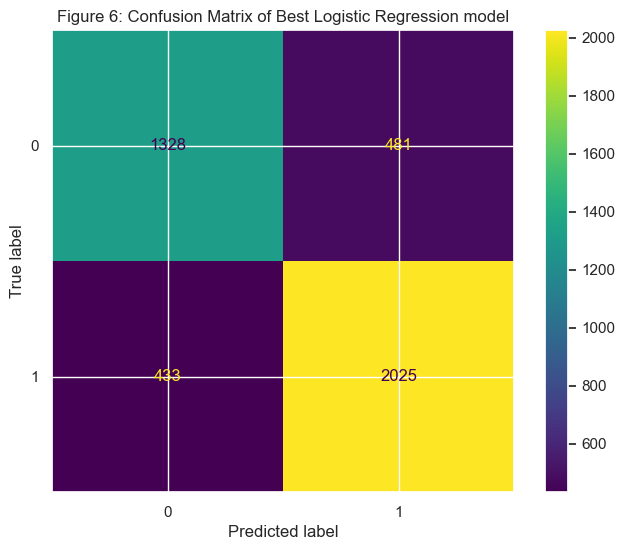

In [140]:
# the function expects the estimator, inputs and target as parameters
ConfusionMatrixDisplay.from_estimator(logreg2, X_test_rs, y_test,)
plt.title("Figure 6: Confusion Matrix of Best Logistic Regression model")
plt.show()

The way that we can interpret figure 6 above are as follows: 

* **TN**: 1328 data points from class 0 were correctly predicted as being a negative review.
* **TP**: 2025 data points from class 1 were correctly predicted as being a negative review. 
* **FP**: 481 data points from class 1 were incorrectly classified as being positive. 
* **FN**: 433 data points from class 0 were incorrectly classified as being negative. 


In [155]:
fn = cf_matrix[1, 0] 
fp = cf_matrix[0, 1] 
tp = cf_matrix[1, 1]

In [157]:
# calculate precision
# true label 1 & predicted label 1

precision = tp/(tp+fp)
recall = tp/(tp+fn)

print(f"Precision is {round(precision,2)*100}%")
print(f"Recall is {round(recall,2)*100}%")

Precision is 81.0%
Recall is 82.0%


In [69]:
#classification
from sklearn.metrics import classification_report

report_logreg = classification_report(y_test, y_pred)
print(report_logreg)

              precision    recall  f1-score   support

           0       0.74      0.73      0.73      1809
           1       0.80      0.81      0.81      2458

    accuracy                           0.78      4267
   macro avg       0.77      0.77      0.77      4267
weighted avg       0.78      0.78      0.78      4267



In [159]:
#baseline perecentage
round(y_train.sum()/y_train.shape[0]*100,4)

57.6077

Overall we can see from the classification report above and taking into account the recall and accuracy, right now we have a balance in the level of false positives and false negatives that we are generating. The F1 score also sees this too, where we are able able to get a score of 0.81. Let's not forget our baseline accuracy of 58% so we have improved the accuracy overall and improved the chances of predicting a positive or negative review. 

## 7. Feature Engineering <a id="Feature"></a>

One of the ways we can add value to the modeling process is by feature engineering. Let's explore the dataset and see if there is a feature we can create. We can bring up our training data set again: 

In [160]:
train_df.sample(2)

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
8309,475,8.9,0,2007,23,10,440,51.505418,-0.124150,4,...,0,0,0,0,0,0,0,0,0,1
3399,397,8.3,62,1640,16,4,541,51.542148,-0.170307,1,...,0,0,0,0,0,0,0,0,0,0


Let's see if any of the numerical columns might have any key differences when comparing against our `rating` column. 

In [163]:
train_df.groupby("rating")[["Total_Number_of_Reviews_Reviewer_Has_Given","Additional_Number_of_Scoring","Review_Total_Negative_Word_Counts", "Review_Total_Positive_Word_Counts"]].agg(["std","mean"])

Total_Number_of_Reviews_Reviewer_Has_Given            \
                                              std      mean   
rating                                                        
0                                        8.471634  5.139908   
1                                        7.718592  5.040011   

       Additional_Number_of_Scoring              \
                                std        mean   
rating                                            
0                        653.605888  778.625069   
1                        559.009829  713.422081   

       Review_Total_Negative_Word_Counts             \
                                     std       mean   
rating                                                
0                              39.475297  30.404055   
1                              17.693607  11.114879   

       Review_Total_Positive_Word_Counts             
                                     std       mean  
rating                                               
0                              14.114507  11.814562  
1                              21.245001  19.839278

It looks like there are some differences in review_total_negative_word_counts and Review_Total_Positive_Word_Counts when comparing the rating column. For example we see that reviews classified as negative see more word counts when writing about the negative (mean of 30), and they write less in the positive (mean of 11). Similarly with those classified as an excellent review, they write more words in the positive review section versus the negative. 

We can look at this a little more in detail by plotting out a box plot to assess. 

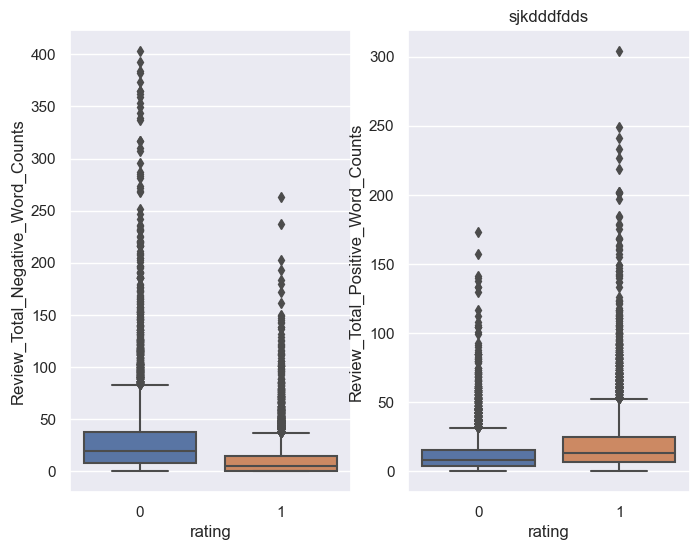

In [183]:
fig, axes = plt.subplots(1, 2)

sns.boxplot( x='rating', y='Review_Total_Negative_Word_Counts', data=train_df,ax=axes[0])
sns.boxplot( x='rating', y='Review_Total_Positive_Word_Counts', data=train_df,ax=axes[1])

plt.show()

Overall we can see that the length of the review word count does seem to change based on if a user gives the score an excellent rating (between 9 and 10) where we can see that the interquartile range is much larger and reaches up to 50 word counts versus they would write less on the negatives (since they may not have anything to say about it). Therefore, we could look to manipulate these columns so that they hold more weight when modeling. 

### 7.1. Reasoning <a id="Why"></a>

In the previous section we explored why `Review_Total_Negative_Word_Counts` and `Review_Total_Positive_Word_Counts` could have an impact on the final model, so let's just take a look quickly at the distributions: 

In [194]:
numeric_columns = ["Review_Total_Negative_Word_Counts","Review_Total_Positive_Word_Counts"]

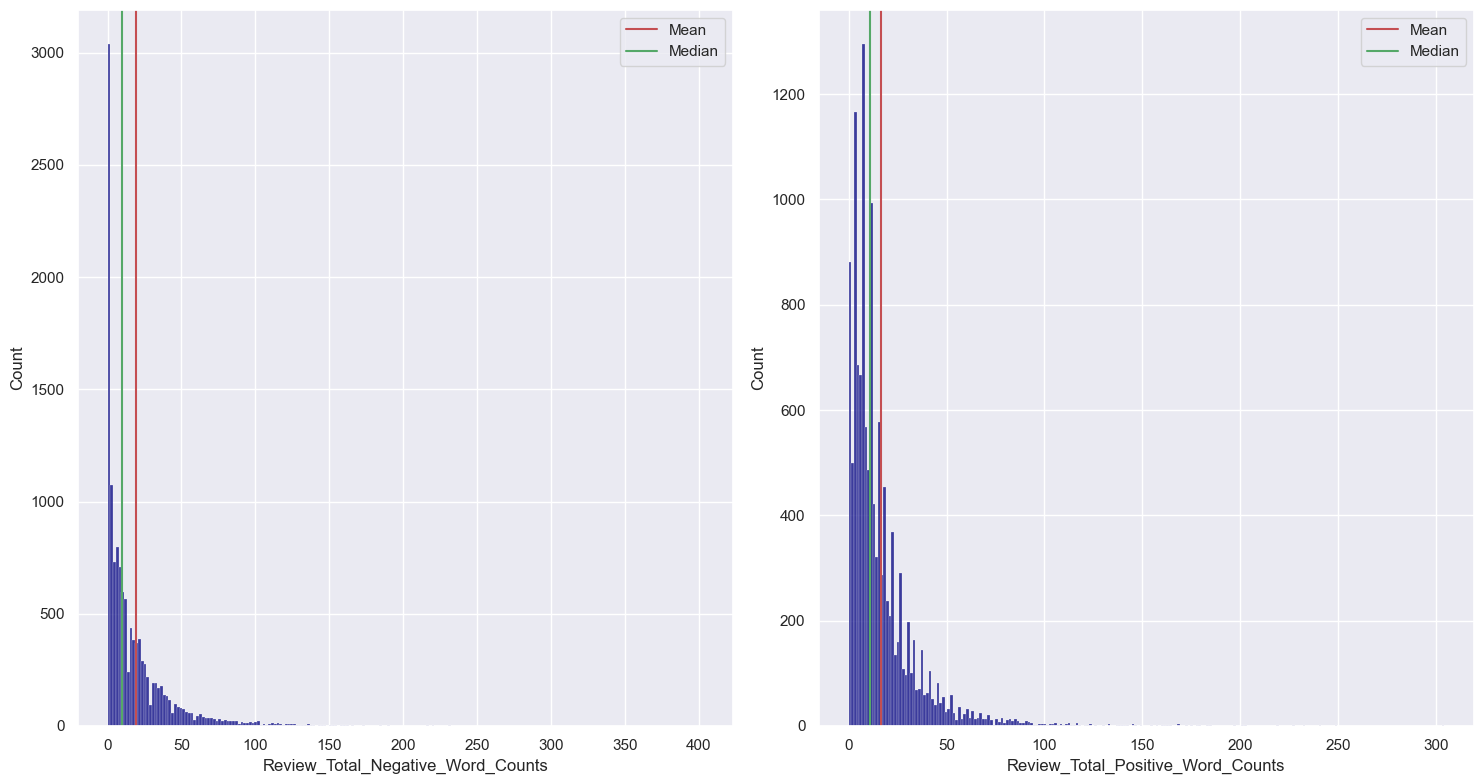

In [197]:
#For loop to look through numerical columns and plot on graph

# Set up grid of subplots
plt.subplots(1,2,figsize=(15,8))

# Initialize counter
plot_num=1

# Loop through column names in list
for col in numeric_columns:
        
    var = train_df[col]
    var_mean = var.mean()
    var_median = var.median()
    
    plt.subplot(1,2,plot_num)
    sns.histplot(var, color= "navy")
    plt.axvline(var_mean, c='r', label='Mean')
    plt.axvline(var_median, c='g', label='Median')
    plt.legend()


    plot_num +=1

# This ensures the subplots do not overlap
plt.tight_layout()

plt.show()

We can see in both cases large right skews to this data, one way to feature engineer is to see perform a log function to try and equally distribute the data. Performing a log function will aim to do a couple of things: 
- help handle skewed data 
- decrease the effect of outliers, due to the help of normalizing the data so the model will become more robust. 

Let's create a new dataset for our train and test sets: 

In [212]:
#creating train_df 
log_train_df = train_df.copy()
log_train_df.sample(2)

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
12434,153,8.4,3,476,13,1,160,51.424241,-0.229350,4,...,0,0,0,0,0,0,0,0,0,1
3424,386,8.7,36,1478,25,1,364,51.513928,-0.127151,3,...,0,0,0,0,0,0,0,0,0,0


In [213]:
#creating test_df 
log_test_df = test_df.copy()
log_test_df.sample(2)

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
1976,1831,8.1,32,7105,30,2,112,51.499046,-0.191707,3,...,0,0,0,0,0,0,0,0,0,1
2269,475,8.9,0,2007,7,8,16,51.505418,-0.124150,1,...,0,0,0,0,0,0,0,0,0,1


In [210]:
log_train_df["Review_Total_Negative_Word_Counts"] = np.log(log_train_df["Review_Total_Negative_Word_Counts"]+1)
log_train_df["Review_Total_Positive_Word_Counts"] = np.log(log_train_df["Review_Total_Positive_Word_Counts"]+1)

In [214]:
log_test_df["Review_Total_Negative_Word_Counts"] = np.log(log_test_df["Review_Total_Negative_Word_Counts"]+1)
log_test_df["Review_Total_Positive_Word_Counts"] = np.log(log_test_df["Review_Total_Positive_Word_Counts"]+1)

Now let's plot out the distributions before and after the log transformation: 

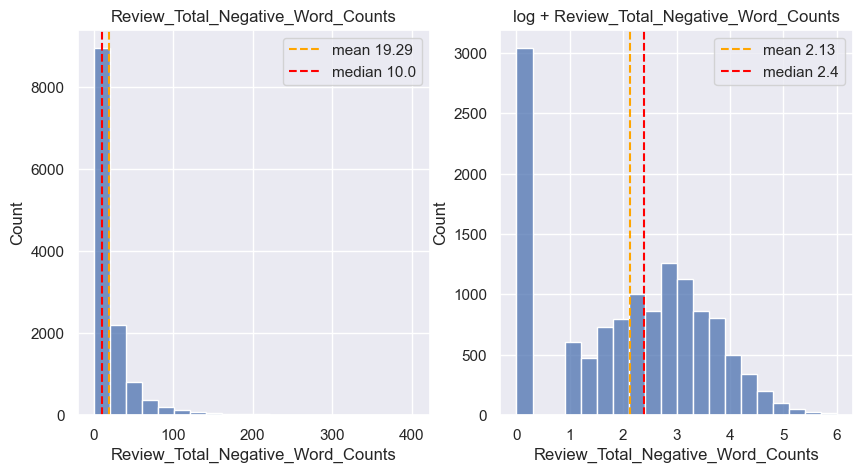

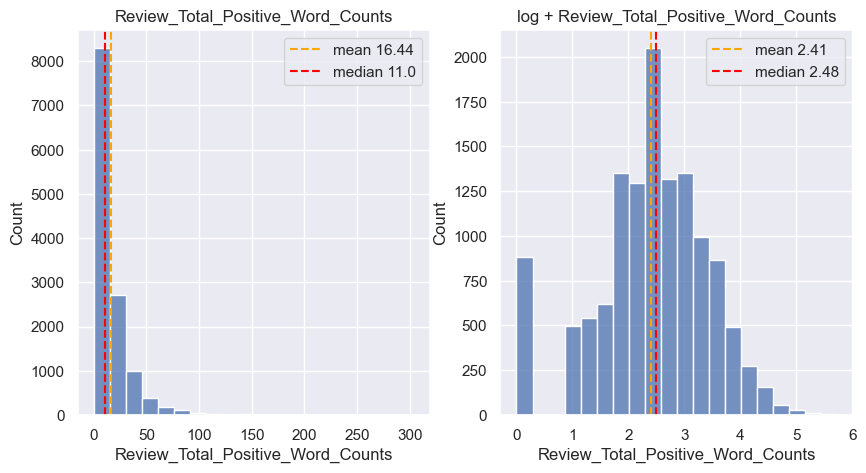

In [211]:
#before and after log transformation

for column in numeric_columns: 
    plt.subplots(1,2,figsize=(10,5))
    
    #processed data
    plt.subplot(1,2,1)
    
    sns.histplot(data=train_df, x= column, bins=20)
    plt.axvline(train_df[column].mean(),0,4000, 
                c= "orange", 
                label=f"mean {round(train_df[column].mean(),2)}", 
                linestyle="--")
    plt.axvline(train_df[column].median(),0,4000,
                c= "red", 
                label=f"median {round(train_df[column].median(),2)}", 
                linestyle="--")
    plt.legend()
    plt.title(column)
    
    #log graph
    plt.subplot(1,2,2)
    sns.histplot(data=log_train_df, x= column, bins=20)
    plt.axvline(log_train_df[column].mean(),0,4000, 
                c= "orange", 
                label=f"mean {round(log_processed_data[column].mean(),2)}", 
                linestyle="--")
    plt.axvline(log_train_df[column].median(),0,4000,
                c= "red", 
                label=f"median {round(log_train_df[column].median(),2)}", 
                linestyle="--")
    plt.legend()
    
    plt.title(f"log + {column}")
    plt.show()

We can see that the 2 columns after the log transformation resemble more normally distributed data. Let's use this and test it out with our final model. 

### 7.2. Final model and re-optimization of hyper parameters <a id="FinalModel"></a>

Now that we have modified some of our columns we will try to refit this model onto our dataset and then retune the hyper parameters. 

In [218]:
#assigning remainder dataset for X and y 
y_remainder_log= log_train_df["rating"]
X_remainder_log  = log_train_df.drop(["rating"],axis=1)

In [216]:
from sklearn.pipeline import Pipeline
from tempfile import mkdtemp
# Set up a directory to cache the pipeline results
cachedir = mkdtemp()

estimators = [('normalise', StandardScaler()),
              ('reduce_dim', PCA()),
              ('model', LogisticRegression())]

pipe = Pipeline(estimators, verbose=4, 
                memory=cachedir)

In [217]:
from sklearn.model_selection import GridSearchCV

# Range of c-values 
c_values = [.001, .1, 1, 10]

logreg_param_grid_final = [
    
    #L2 default without PCA 
    {'normalise': [StandardScaler(), MinMaxScaler(), RobustScaler()], 
    'reduce_dim': [None],
     'model' : [LogisticRegression(solver='lbfgs', random_state=8, n_jobs=-1,max_iter=10000)],
     'model__C': c_values },
]

In [219]:
from sklearn.model_selection import GridSearchCV

#activating grid search 
grid_search_final = GridSearchCV(pipe, param_grid=logreg_param_grid_final, cv=5, verbose = 4,refit=False) #also performing cross validation

fitted_logreg = grid_search_final.fit(X_remainder_log, y_remainder_log)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[Pipeline] ......... (step 1 of 3) Processing normalise, total=   1.8s
[Pipeline] ........ (step 2 of 3) Processing reduce_dim, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total=  27.7s
[CV 1/5] END model=LogisticRegression(max_iter=10000, n_jobs=-1, random_state=8), model__C=0.001, normalise=StandardScaler(), reduce_dim=None;, score=0.784 total time=  31.6s
[Pipeline] ......... (step 1 of 3) Processing normalise, total=   1.0s


/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:348: UserWarning: Persisting input arguments took 0.92s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


[Pipeline] ........ (step 2 of 3) Processing reduce_dim, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total=  23.1s
[CV 2/5] END model=LogisticRegression(max_iter=10000, n_jobs=-1, random_state=8), model__C=0.001, normalise=StandardScaler(), reduce_dim=None;, score=0.776 total time=  26.5s
[Pipeline] ......... (step 1 of 3) Processing normalise, total=   1.2s
[Pipeline] ........ (step 2 of 3) Processing reduce_dim, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total=  22.8s
[CV 3/5] END model=LogisticRegression(max_iter=10000, n_jobs=-1, random_state=8), model__C=0.001, normalise=StandardScaler(), reduce_dim=None;, score=0.772 total time=  25.9s
[Pipeline] ......... (step 1 of 3) Processing normalise, total=   1.1s
[Pipeline] ........ (step 2 of 3) Processing reduce_dim, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total=  21.5s
[CV 4/5] END model=LogisticRegression(max_iter=10000, n_jobs=-1, random_state=8), 

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:348: UserWarning: Persisting input arguments took 0.56s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


[Pipeline] ........ (step 2 of 3) Processing reduce_dim, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total=  11.8s
[CV 1/5] END model=LogisticRegression(max_iter=10000, n_jobs=-1, random_state=8), model__C=0.001, normalise=MinMaxScaler(), reduce_dim=None;, score=0.695 total time=  14.3s
[Pipeline] ......... (step 1 of 3) Processing normalise, total=   0.7s
[Pipeline] ........ (step 2 of 3) Processing reduce_dim, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total=  13.2s
[CV 2/5] END model=LogisticRegression(max_iter=10000, n_jobs=-1, random_state=8), model__C=0.001, normalise=MinMaxScaler(), reduce_dim=None;, score=0.664 total time=  15.7s
[Pipeline] ......... (step 1 of 3) Processing normalise, total=   0.8s
[Pipeline] ........ (step 2 of 3) Processing reduce_dim, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total=  14.2s
[CV 3/5] END model=LogisticRegression(max_iter=10000, n_jobs=-1, random_state=8), mode

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:348: UserWarning: Persisting input arguments took 0.52s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


[Pipeline] ........ (step 2 of 3) Processing reduce_dim, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total=  15.0s
[CV 5/5] END model=LogisticRegression(max_iter=10000, n_jobs=-1, random_state=8), model__C=0.001, normalise=RobustScaler(), reduce_dim=None;, score=0.769 total time=  19.0s
[Pipeline] ........ (step 2 of 3) Processing reduce_dim, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total= 1.3min
[CV 1/5] END model=LogisticRegression(max_iter=10000, n_jobs=-1, random_state=8), model__C=0.1, normalise=StandardScaler(), reduce_dim=None;, score=0.738 total time= 1.4min
[Pipeline] ........ (step 2 of 3) Processing reduce_dim, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total= 1.4min
[CV 2/5] END model=LogisticRegression(max_iter=10000, n_jobs=-1, random_state=8), model__C=0.1, normalise=StandardScaler(), reduce_dim=None;, score=0.732 total time= 1.5min
[Pipeline] ........ (step 2 of 3) Processing reduce_dim

[Pipeline] ............. (step 3 of 3) Processing model, total= 3.0min
[CV 1/5] END model=LogisticRegression(max_iter=10000, n_jobs=-1, random_state=8), model__C=1, normalise=RobustScaler(), reduce_dim=None;, score=0.789 total time= 3.0min
[Pipeline] ........ (step 2 of 3) Processing reduce_dim, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total= 3.2min
[CV 2/5] END model=LogisticRegression(max_iter=10000, n_jobs=-1, random_state=8), model__C=1, normalise=RobustScaler(), reduce_dim=None;, score=0.775 total time= 3.2min
[Pipeline] ........ (step 2 of 3) Processing reduce_dim, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total= 3.1min
[CV 3/5] END model=LogisticRegression(max_iter=10000, n_jobs=-1, random_state=8), model__C=1, normalise=RobustScaler(), reduce_dim=None;, score=0.776 total time= 3.1min
[Pipeline] ........ (step 2 of 3) Processing reduce_dim, total=   0.0s
[Pipeline] ............. (step 3 of 3) Processing model, total= 2.9

In [221]:
pd.DataFrame(fitted_logreg.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__C,param_normalise,param_reduce_dim,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,26.492299,2.561390,0.141448,0.020266,"LogisticRegression(max_iter=10000, n_jobs=-1, ...",0.001,StandardScaler(),None,"{'model': LogisticRegression(max_iter=10000, n...",0.783984,0.776172,0.771875,0.780774,0.768660,0.776293,0.005604,4
1,15.511625,0.824222,0.126123,0.022817,"LogisticRegression(max_iter=10000, n_jobs=-1, ...",0.001,MinMaxScaler(),None,"{'model': LogisticRegression(max_iter=10000, n...",0.694922,0.663672,0.681641,0.674091,0.669793,0.676824,0.010776,12
2,18.519889,0.614278,0.097306,0.012914,"LogisticRegression(max_iter=10000, n_jobs=-1, ...",0.001,RobustScaler(),None,"{'model': LogisticRegression(max_iter=10000, n...",0.774219,0.769141,0.772656,0.767487,0.768660,0.770433,0.002560,6
3,90.068710,8.272832,0.132319,0.041955,"LogisticRegression(max_iter=10000, n_jobs=-1, ...",0.1,StandardScaler(),None,"{'model': LogisticRegression(max_iter=10000, n...",0.737500,0.731641,0.734766,0.738961,0.726846,0.733943,0.004340,9
4,61.330183,5.284845,0.097988,0.006825,"LogisticRegression(max_iter=10000, n_jobs=-1, ...",0.1,MinMaxScaler(),None,"{'model': LogisticRegression(max_iter=10000, n...",0.784375,0.787109,0.784375,0.783900,0.774131,0.782778,0.004470,2
5,89.806340,12.448877,0.102408,0.016703,"LogisticRegression(max_iter=10000, n_jobs=-1, ...",0.1,RobustScaler(),None,"{'model': LogisticRegression(max_iter=10000, n...",0.792578,0.789062,0.788281,0.787417,0.777257,0.786919,0.005140,1
6,183.682051,7.737973,0.115129,0.018430,"LogisticRegression(max_iter=10000, n_jobs=-1, ...",1,StandardScaler(),None,"{'model': LogisticRegression(max_iter=10000, n...",0.728516,0.722266,0.727734,0.724111,0.717859,0.724097,0.003874,10
7,130.169843,4.818003,0.095994,0.025249,"LogisticRegression(max_iter=10000, n_jobs=-1, ...",1,MinMaxScaler(),None,"{'model': LogisticRegression(max_iter=10000, n...",0.787500,0.780469,0.778516,0.776866,0.760063,0.776683,0.009066,3
8,184.911613,5.828661,0.113324,0.018214,"LogisticRegression(max_iter=10000, n_jobs=-1, ...",1,RobustScaler(),None,"{'model': LogisticRegression(max_iter=10000, n...",0.788672,0.775000,0.775781,0.769050,0.753810,0.772463,0.011312,5
9,305.622554,38.717152,0.120853,0.027435,"LogisticRegression(max_iter=10000, n_jobs=-1, ...",10,StandardScaler(),None,"{'model': LogisticRegression(max_iter=10000, n...",0.723828,0.718750,0.728906,0.721376,0.711997,0.720971,0.005599,11


In [222]:
fitted_logreg.best_params_

{'model': LogisticRegression(max_iter=10000, n_jobs=-1, random_state=8),
 'model__C': 0.1,
 'normalise': RobustScaler(),
 'reduce_dim': None}

From our final data set with log transformation we can see that the best hyper parameters have remained the same. 

Let's fit this to our final model and see the test accuracy score: 

In [223]:
#assigning dataset for X and y 
y_train_log= log_train_df["rating"]
X_train_log = log_train_df.drop(["rating"],axis=1)

In [224]:
#assigning test dataset for X and y 
y_test_log = log_test_df["rating"]
X_test_log = log_test_df.drop(["rating"],axis=1)

In [225]:
# Instantiate the scaler
RS = RobustScaler()

# Fit the scaler
RS.fit(X_train_log)

# Transform the training and test sets 
X_train_rs = RS.transform(X_train_log)
X_test_rs = RS.transform(X_test_log)

In [229]:
#refitting best model
logreg_final = LogisticRegression(C = 0.1, 
                             solver='lbfgs',
                            max_iter = 1000)

# Fit the model 
logreg_final.fit(X_train_rs, y_train_log)

# Score the model 

log_train_acc2 = logreg_final.score(X_train_rs, y_train_log)
log_test_acc2 = logreg_final.score(X_test_rs, y_test_log)

In [230]:
# Score the model 
print(f"Train Accuracy Score: {round(log_train_acc2,4)*100}%")
print(f"Test Accuracy Score: {round(log_test_acc2 ,4)*100}%")

Train Accuracy Score: 83.23%
Test Accuracy Score: 78.2%


In [231]:
# Get class predictions
y_pred = logreg2.predict(X_test_rs)

#classification
from sklearn.metrics import classification_report

report_logreg = classification_report(y_test, y_pred)
print(report_logreg)

              precision    recall  f1-score   support

           0       0.77      0.70      0.73      1809
           1       0.79      0.84      0.82      2458

    accuracy                           0.78      4267
   macro avg       0.78      0.77      0.77      4267
weighted avg       0.78      0.78      0.78      4267



In the end we have dropped the accuracy score by 0.3% but increased our f1-score by 0.01 so we may need to make a few more tweaks but overall we can say that our model can predict sentiment given logistic regression. 

## 8. Conclusion <a id="Conclude"></a>

To conclude throughout this project we have taken our cleaned dataset and fitted various models against it (including K neighbors classifier, Decision Tree and Logistic Regression) in order to try and find the most suitable model. We then chose the Logistic Regression model due to its promising initial results and then tuned in the hyper parameter to try and optimize the model. Lastly we performed some feature engineering in order to try and optimize the model even further on the Hotel review dataset. 